In [3]:
# Cell 1: Imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [4]:
# Load the dataset (uploaded by user)
df = pd.read_csv('/content/diabetes.csv')
print('Loaded dataset with shape:', df.shape)
df.head()


Loaded dataset with shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Cell 3: Quick info and summary statistics
print('Number of rows and columns:', df.shape)
print('\nColumn types and non-null counts:')
print(df.info())
print('\nBasic statistics (mean, std, min, max, etc.):')
df.describe()


Number of rows and columns: (768, 9)

Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Basic statistics (mean, std, min, max, etc.):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#heck zeros that indicate missing values
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in cols_with_missing:
    zeros = (df[c] == 0).sum()
    print(f"{c}: zeros = {zeros}")

Glucose: zeros = 5
BloodPressure: zeros = 35
SkinThickness: zeros = 227
Insulin: zeros = 374
BMI: zeros = 11


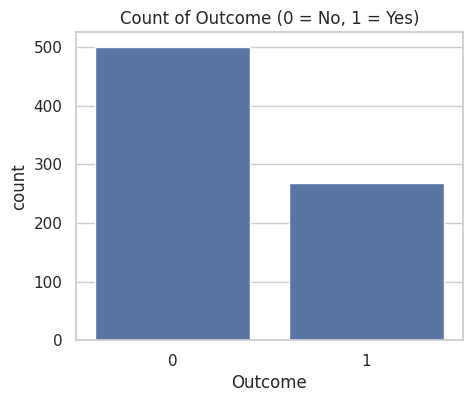

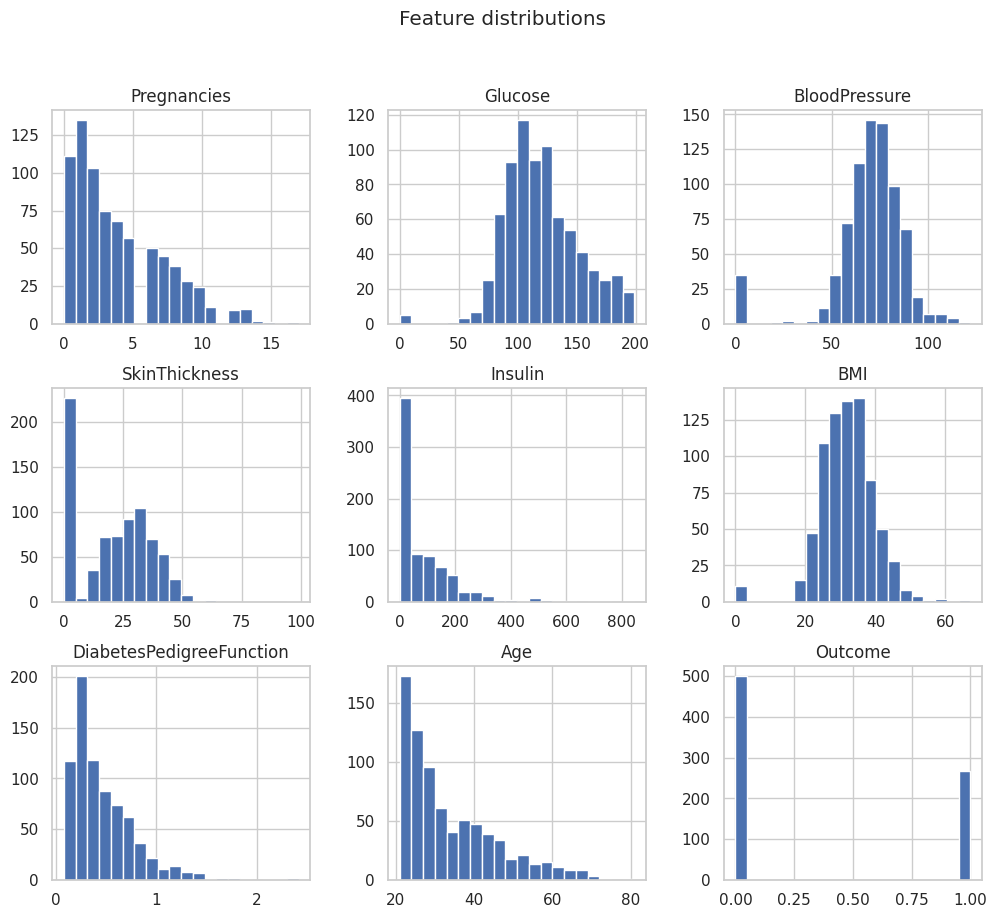

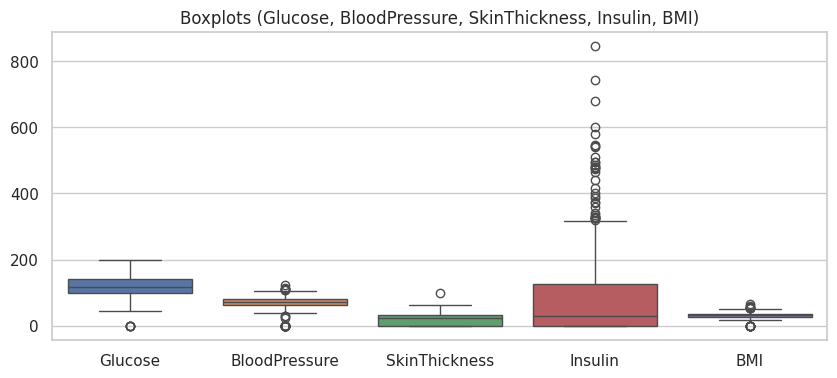

In [7]:
#plots
sns.set(style='whitegrid')

plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title('Count of Outcome (0 = No, 1 = Yes)')
plt.show()

# Histograms
df.hist(bins=20, figsize=(12,10))
plt.suptitle('Feature distributions')
plt.show()

# Boxplots for selected features
plt.figure(figsize=(10,4))
sns.boxplot(data=df[cols_with_missing])
plt.title('Boxplots (Glucose, BloodPressure, SkinThickness, Insulin, BMI)')
plt.show()

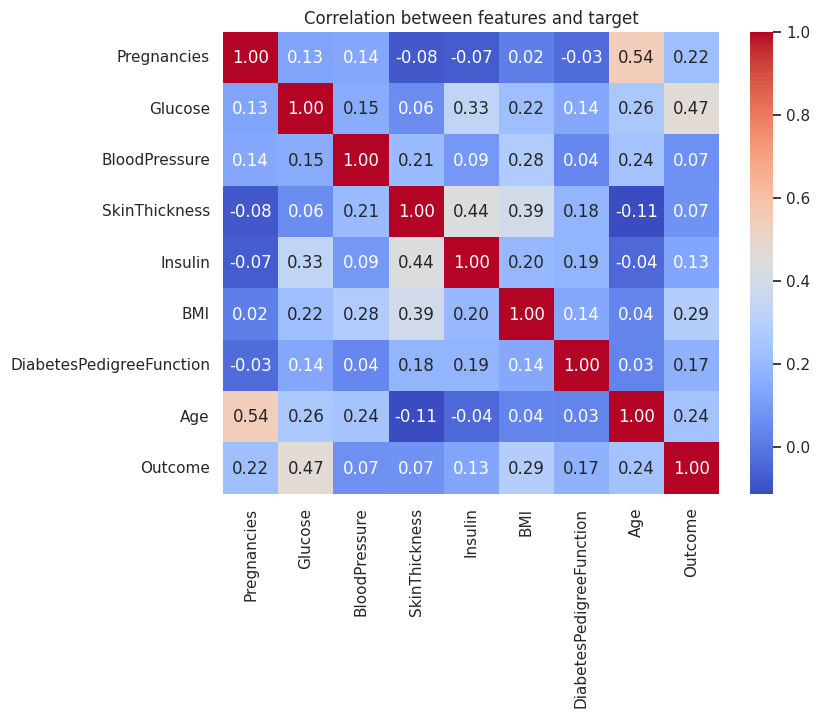

In [8]:
#Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between features and target')
plt.show()

In [9]:
#Replace zeros with NaN and impute using median
data = df.copy()
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)
print('Missing values after replacing zeros with NaN:')
print(data.isnull().sum())

imputer = SimpleImputer(strategy='median')
data[cols_with_missing] = imputer.fit_transform(data[cols_with_missing])
print('\nMissing values after imputation:')
print(data.isnull().sum())
data.head()


Missing values after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
#Show describe and 99th percentiles for these columns
for c in cols_with_missing + ['Age', 'Pregnancies']:
    print('\n', c)
    print(data[c].describe())
    print('99th percentile:', data[c].quantile(0.99))


 Glucose
count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
99th percentile: 196.0

 BloodPressure
count    768.000000
mean      72.386719
std       12.096642
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
99th percentile: 106.0

 SkinThickness
count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
99th percentile: 51.33000000000004

 Insulin
count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
99th percentile: 519.9000000000012

 BMI
count    768.000000
mean      32.455208
std        6.8

In [11]:
#Prepare X and y, then split into train and test
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (614, 8) Test shape: (154, 8)


In [12]:
from sklearn.preprocessing import StandardScaler

#  Scaling with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Scaled train mean approx (should be near 0):', X_train_scaled.mean(axis=0).round(3))
print('Scaled train std  (should be 1):', X_train_scaled.std(axis=0).round(3))

Scaled train mean approx (should be near 0): [-0. -0.  0. -0. -0. -0. -0. -0.]
Scaled train std  (should be 1): [1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
#Train and compare multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc, prec, rec, f1))

results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1'])
results_df.sort_values('F1', ascending=False)

,Model,Accuracy,Precision,Recall,F1
4,Random Forest,0.779221,0.717391,0.611111,0.660000
1,kNN,0.753247,0.660000,0.611111,0.634615
5,Gradient Boosting,0.759740,0.688889,0.574074,0.626263
2,SVM,0.740260,0.652174,0.555556,0.600000
0,Logistic Regression,0.707792,0.600000,0.500000,0.545455
3,Decision Tree,0.681818,0.553191,0.481481,0.514851


In [14]:
# Confusion matrix and classification report for Random Forest
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix (rows = actual, cols = predicted):')
print(cm)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf, digits=4))

Confusion Matrix (rows = actual, cols = predicted):
[[87 13]
 [21 33]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8056    0.8700    0.8365       100
           1     0.7174    0.6111    0.6600        54

    accuracy                         0.7792       154
   macro avg     0.7615    0.7406    0.7483       154
weighted avg     0.7746    0.7792    0.7746       154



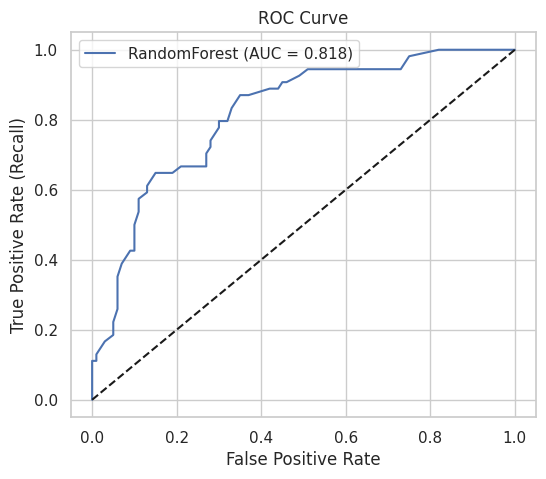

ROC AUC: 0.818


In [15]:
#  ROC curve and AUC for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = rf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'RandomForest (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('ROC AUC:', round(auc, 3))

Glucose                     0.274086
BMI                         0.161903
DiabetesPedigreeFunction    0.125020
Age                         0.112985
Insulin                     0.091224
BloodPressure               0.083518
Pregnancies                 0.080795
SkinThickness               0.070468
dtype: float64


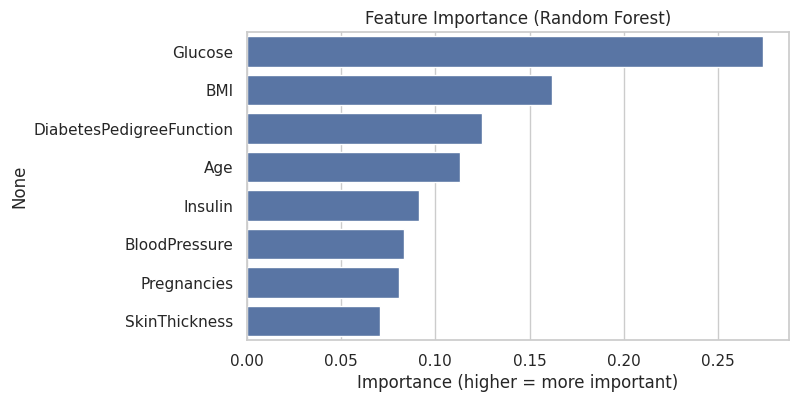

In [16]:
#Feature importance for Random Forest
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_imp)

plt.figure(figsize=(7,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance (higher = more important)')
plt.show()

In [17]:
#5-fold cross-validation (F1) for RandomForest
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(RandomForestClassifier(random_state=42, n_estimators=100),
                            scaler.transform(X), y, cv=cv, scoring='f1')
print('CV F1 scores:', cv_scores)
print('Mean CV F1:', cv_scores.mean().round(3))

CV F1 scores: [0.65346535 0.59793814 0.68041237 0.5625     0.59615385]
Mean CV F1: 0.618
